<a href="https://colab.research.google.com/github/Sreeja1585/my-projects/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin        

/tmp/ipython-input-6-2064697838.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


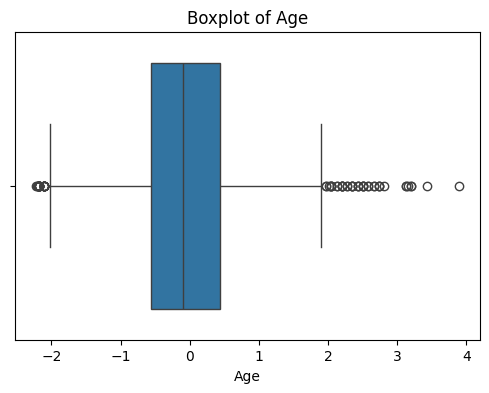

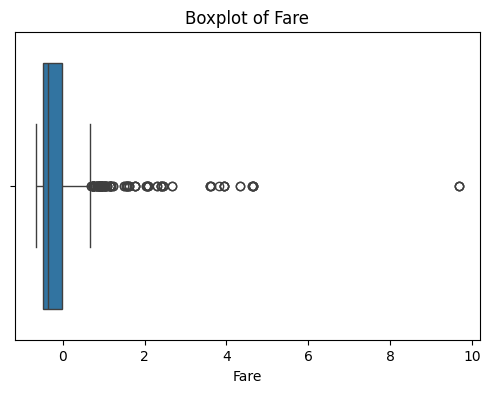

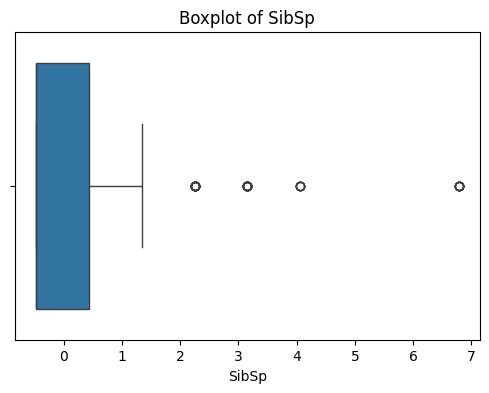

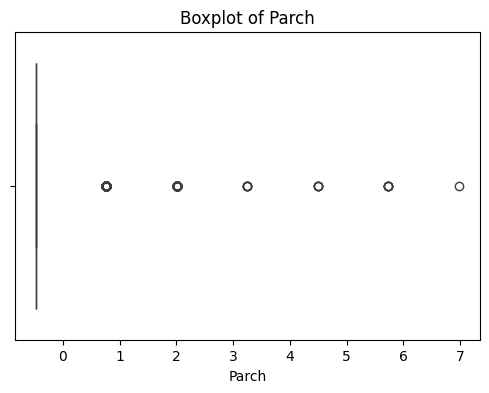


Final cleaned dataset shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age     SibSp  \
0                            Braund, Mr. Owen Harris    1 -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  0.663861  0.432793   
2                             Heikkinen, Miss. Laina    0 -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312  0.432793   
4                           Allen, Mr. William Henry    1  0.433312 -0.474545   

      Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0 -0.473674         A/5 21171 -0.502445       False        True  
1 -0.473674          PC 17599  0.786845       False       False  
2 -0.473674  STON/O2. 3101282 -0.488854       False       

In [ ]:

# Import Libraries and Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Titanic dataset from CSV file
df = pd.read_csv('Titanic-Dataset.csv')

print("Initial Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


#  Handle Missing Values

# Drop high-missing-value columns if they exist
columns_to_drop = ['Cabin', 'Deck', 'embark_town', 'alive']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Impute 'Age' and 'Fare' with median
imputer = SimpleImputer(strategy='median')
if 'Age' in df.columns:
    df['Age'] = imputer.fit_transform(df[['Age']])
if 'Fare' in df.columns:
    df['Fare'] = imputer.fit_transform(df[['Fare']])

# Fill 'Embarked' with mode
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Confirm missing values handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

#  Encode Categorical Features

# Label encode 'Sex'
if 'Sex' in df.columns:
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])

# One-hot encode 'Embarked' and 'Pclass' (if exists and categorical)
categorical_cols = []
if 'Embarked' in df.columns:
    categorical_cols.append('Embarked')
if 'Pclass' in df.columns and df['Pclass'].dtype == object:
    categorical_cols.append('Pclass')

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Normalize/Standardize Numerical Features
scaler = StandardScaler()
num_cols = [col for col in ['Age', 'Fare', 'SibSp', 'Parch'] if col in df.columns]

df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nStandardized Numerical Columns:")
print(df[num_cols].head())

# Visualize Outliers with Boxplots
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Final cleaned Dataset
print("\nFinal cleaned dataset shape:", df.shape)
print(df.head())
